## Data Structures and Algorithms Assignment 2
## Cian Belton 19321726 
## George Dagg 

### Imports for this notebook:

In [3]:
import networkx as net
import matplotlib.pyplot as plt

### Task 1: Sorting Algorithm Run Time and Complexity

### Task 2: Shortest Path (Dijkstra's) Algorithm and Graphs

The following image is the step through of Dijkstraâs algorithm for the provided graph to go from vertex A to vertex G.
The key is as follows:
- Each vertex that has been visited is added to 'Visited:' with the most recent addition the current vertex.
- The lowest total distance currently for each node is underlined in red beside each node.
- The best path known so far to each node is highlighted in yellow.
- Note for the sake of brevity I did not include any nodes that were at infinity, so any nodes not included in the first 4 images are at infinity.

<img src="dijkstra_by_hand.jpg">


#### Discussion of results:
From the image above it is clear that there were many changes for the shortest paths in this weighted graph. This can be easily seen in the change of where the highlighted lines are. G for example had 3 different weights depending on the stage of the algorithm: 29, 26 and 25.

### Verification of results with code

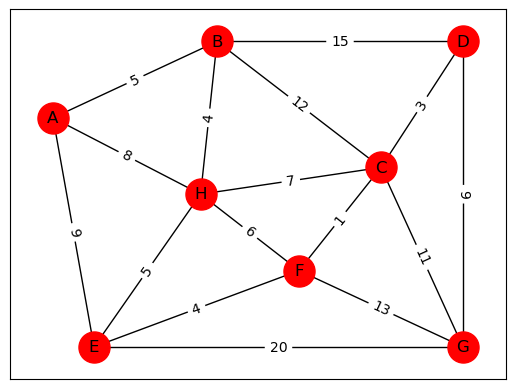

In [22]:
#create an empty weighted graph
G = net.Graph()

#adding nodes to the graph
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])

#add weighted edges
G.add_edge('A', 'B', weight=5)
G.add_edge('A', 'H', weight=8)
G.add_edge('A', 'E', weight=9)
G.add_edge('B', 'H', weight=4)
G.add_edge('B', 'C', weight=12)
G.add_edge('B', 'D', weight=15)
G.add_edge('C', 'D', weight=3)
G.add_edge('C', 'G', weight=11)
G.add_edge('D', 'G', weight=9)
G.add_edge('C', 'F', weight=1)
G.add_edge('F', 'G', weight=13)
G.add_edge('E', 'F', weight=4)
G.add_edge('E', 'G', weight=20)
G.add_edge('E', 'H', weight=5)
G.add_edge('C', 'H', weight=7)
G.add_edge('H', 'F', weight=6)

#draw the graph
pos= {'A': [0, -0.2], 'B': [0.2,  0], 'C': [0.4,-.33], 'D': [0.5, 0], 'E': [0.05, -0.8], 'F': [0.3, -0.6], 'G': [0.5,-0.8], 'H': [ 0.18, -0.4]}
net.draw_networkx(G, pos, with_labels=True, node_color='red', node_size=500)
edge_labels = net.get_edge_attributes(G, 'weight')
d=net.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()


In [25]:
# dijkstra's algorithm

### Task 3: Minimum Spanning Tree (MST) using Prim's Algorithm
